In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('retail_sales_dataset.csv')

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [6]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


<Axes: xlabel='Age'>

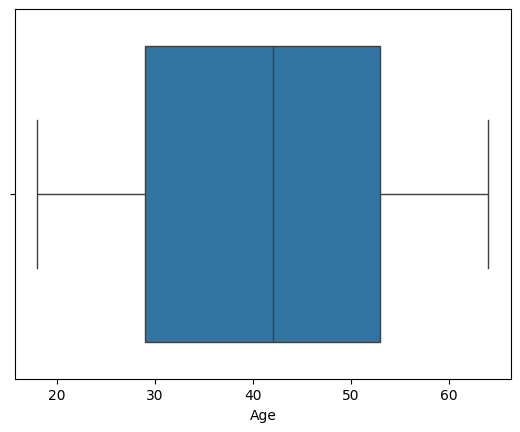

In [7]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='Total Amount'>

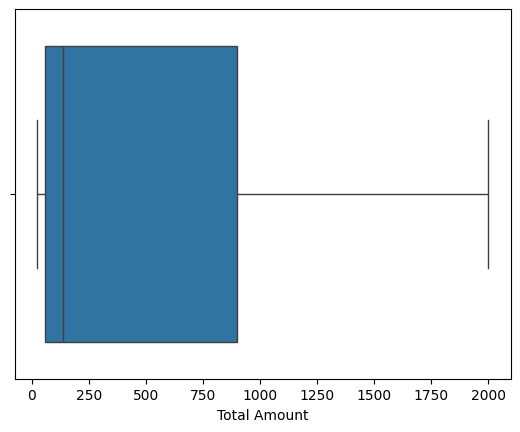

In [8]:
sns.boxplot(x=df['Total Amount'])

<Axes: xlabel='Price per Unit'>

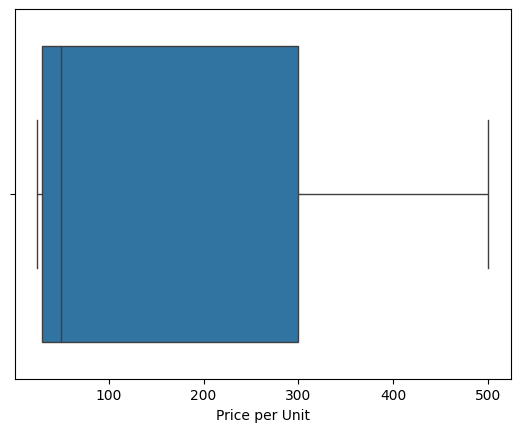

In [9]:
sns.boxplot(x=df['Price per Unit'])

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [12]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.dayofweek # Monday=0, Sunday=6

In [13]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day,day_of_week
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,24,4
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,27,0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,13,4
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,21,6
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,6,5


In [14]:
df = df.drop(['Date', 'Customer ID', 'Transaction ID'], axis=1)

In [15]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day,day_of_week
0,Male,34,Beauty,3,50,150,2023,11,24,4
1,Female,26,Clothing,2,500,1000,2023,2,27,0
2,Male,50,Electronics,1,30,30,2023,1,13,4
3,Male,37,Clothing,1,500,500,2023,5,21,6
4,Male,30,Beauty,2,50,100,2023,5,6,5


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            1000 non-null   object
 1   Age               1000 non-null   int64 
 2   Product Category  1000 non-null   object
 3   Quantity          1000 non-null   int64 
 4   Price per Unit    1000 non-null   int64 
 5   Total Amount      1000 non-null   int64 
 6   year              1000 non-null   int32 
 7   month             1000 non-null   int32 
 8   day               1000 non-null   int32 
 9   day_of_week       1000 non-null   int32 
dtypes: int32(4), int64(4), object(2)
memory usage: 62.6+ KB


In [17]:
df.groupby('year')['Total Amount'].sum()

year
2023    454470
2024      1530
Name: Total Amount, dtype: int64

In [18]:
X = df.drop(['Total Amount'], axis = 1)
y = df['Total Amount']

In [19]:
X.head()

,Gender,Age,Product Category,Quantity,Price per Unit,year,month,day,day_of_week
0,Male,34,Beauty,3,50,2023,11,24,4
1,Female,26,Clothing,2,500,2023,2,27,0
2,Male,50,Electronics,1,30,2023,1,13,4
3,Male,37,Clothing,1,500,2023,5,21,6
4,Male,30,Beauty,2,50,2023,5,6,5


In [20]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [21]:
X['Gender'] = encode.fit_transform(X['Gender'])
X['Product Category'] = encode.fit_transform(X['Product Category'])

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Gender            1000 non-null   int64
 1   Age               1000 non-null   int64
 2   Product Category  1000 non-null   int64
 3   Quantity          1000 non-null   int64
 4   Price per Unit    1000 non-null   int64
 5   year              1000 non-null   int32
 6   month             1000 non-null   int32
 7   day               1000 non-null   int32
 8   day_of_week       1000 non-null   int32
dtypes: int32(4), int64(5)
memory usage: 54.8 KB


In [23]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [24]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<Axes: xlabel='year', ylabel='Total Amount'>

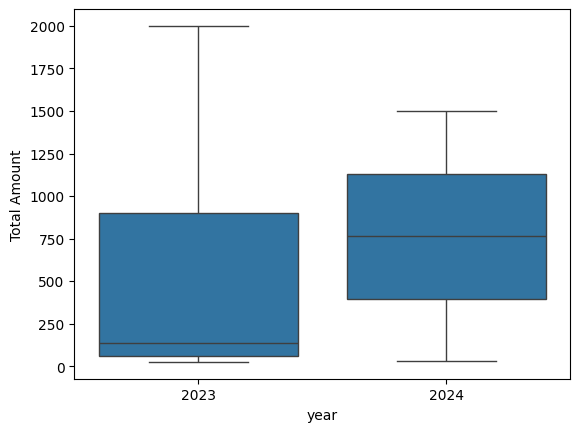

In [25]:
sns.boxplot( data = df, x = 'year', y = 'Total Amount')

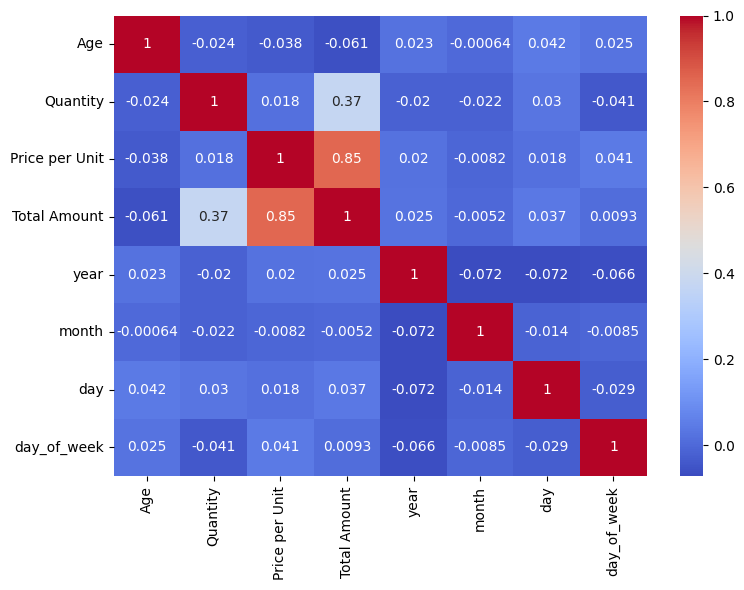

In [26]:
numeric_df = df.select_dtypes(include='number')  # sirf numeric columns
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
X_train.head()

,Gender,Age,Product Category,Quantity,Price per Unit,year,month,day,day_of_week
29,0,39,0,3,300,2023,10,29,6
535,0,55,0,4,30,2023,3,5,6
695,0,50,1,4,50,2023,9,6,2
557,0,41,1,1,25,2023,10,8,6
836,1,18,0,3,30,2023,7,1,5


In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Cross Validation

In [32]:
score = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 5)

In [33]:
score

array([0.84563188, 0.79792916, 0.86367953, 0.837394  , 0.88155613])

In [34]:
print(score.mean())

0.8452381395255486


In [35]:
y_pred = model.predict(x_test)

In [36]:
r2 = r2_score(y_pred, y_test)
r2

0.8272500655812212

# Random Forest Regression

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(x_test)

print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 1.0


In [38]:
print(y_test.values[:10])
print(y_pred[:10])

[1500  100  300  100 2000   90   50  300  200 1000]
[1500.  100.  300.  100. 2000.   90.   50.  300.  200. 1000.]


In [39]:
from sklearn.metrics import r2_score

# Suppose we already have predictions
r2 = r2_score(y_test, y_pred)

n = x_test.shape[0]   # number of observations
p = x_test.shape[1]   # number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R2 Score:", r2)
print("Adjusted R2 Score:", adjusted_r2)

R2 Score: 1.0
Adjusted R2 Score: 1.0


# Ridge Regression

In [40]:
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [41]:
ridge_regression = Ridge()
lasso_resgression = Lasso()

In [42]:
parameters = {'alpha' : [1, 2, 10, 20, 30, 40, 50, 60, 90]}
ridgecv = GridSearchCV(ridge_regression, parameters, scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [43]:
print(ridgecv.best_params_)

{'alpha': 1}


In [44]:
ridge_pred = ridgecv.predict(x_test)

In [45]:
print("R2 Score:", r2_score(y_test, ridge_pred))

R2 Score: 0.8528819676851838


In [46]:
from sklearn.metrics import r2_score

# Suppose we already have predictions
r2 = r2_score(y_test, ridge_pred)

n = x_test.shape[0]   # number of observations
p = x_test.shape[1]   # number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R2 Score:", r2)
print("Adjusted R2 Score:", adjusted_r2)

R2 Score: 0.8528819676851838
Adjusted R2 Score: 0.8459132187860608


In [47]:
parameters = {'alpha' : [1, 2, 10, 20, 30, 40, 50, 60, 90]}
lassocv = GridSearchCV(lasso_resgression, parameters, scoring='neg_mean_squared_error', cv=5)
lassocv.fit(X_train, y_train)

,estimator,Lasso()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [48]:
print(lassocv.best_params_)

{'alpha': 1}


In [49]:
lasso_pred = lassocv.predict(x_test)

In [50]:
from sklearn.metrics import r2_score

# Suppose we already have predictions
r2 = r2_score(y_test, lasso_pred)

n = x_test.shape[0]   # number of observations
p = x_test.shape[1]   # number of predictors

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R2 Score:", r2)
print("Adjusted R2 Score:", adjusted_r2)

R2 Score: 0.8534153210869784
Adjusted R2 Score: 0.8464718362963616


In [51]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day,day_of_week
0,Male,34,Beauty,3,50,150,2023,11,24,4
1,Female,26,Clothing,2,500,1000,2023,2,27,0
2,Male,50,Electronics,1,30,30,2023,1,13,4
3,Male,37,Clothing,1,500,500,2023,5,21,6
4,Male,30,Beauty,2,50,100,2023,5,6,5


In [52]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day,day_of_week
0,Male,34,Beauty,3,50,150,2023,11,24,4
1,Female,26,Clothing,2,500,1000,2023,2,27,0
2,Male,50,Electronics,1,30,30,2023,1,13,4
3,Male,37,Clothing,1,500,500,2023,5,21,6
4,Male,30,Beauty,2,50,100,2023,5,6,5


In [53]:
df["date"] = pd.to_datetime(df[["year","month","day"]])

In [54]:
df = df.drop('day_of_week',axis = 1)

In [55]:
df = df.sort_values(["date"])

In [56]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day,date
521,Male,46,Beauty,3,500,1500,2023,1,1,2023-01-01
179,Male,41,Clothing,3,300,900,2023,1,1,2023-01-01
558,Female,40,Clothing,4,300,1200,2023,1,1,2023-01-01
302,Male,19,Electronics,3,30,90,2023,1,2,2023-01-02
978,Female,19,Beauty,1,25,25,2023,1,2,2023-01-02


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 521 to 649
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Gender            1000 non-null   object        
 1   Age               1000 non-null   int64         
 2   Product Category  1000 non-null   object        
 3   Quantity          1000 non-null   int64         
 4   Price per Unit    1000 non-null   int64         
 5   Total Amount      1000 non-null   int64         
 6   year              1000 non-null   int32         
 7   month             1000 non-null   int32         
 8   day               1000 non-null   int32         
 9   date              1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(3), int64(4), object(2)
memory usage: 74.2+ KB
